<a href="https://colab.research.google.com/github/Danielewicz-code/California-houses-LR/blob/main/Houses_California_100_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import OneHotEncoder

In [3]:
# Descargar el conjunto de datos
casas_url = 'https://raw.githubusercontent.com/ageron/handson-ml2/master/datasets/housing/housing.csv'
#pasar los datos
housing_data = pd.read_csv(casas_url)


Visualizar el dataset

In [4]:
#imprimir el tamaño del tataset
housing_data.shape

(20640, 10)

In [5]:
#ver los datos y sus valores medios
print(housing_data.head())

#ver la informacion tectica del dataset
print(housing_data.info())

   longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -122.23     37.88                41.0        880.0           129.0   
1    -122.22     37.86                21.0       7099.0          1106.0   
2    -122.24     37.85                52.0       1467.0           190.0   
3    -122.25     37.85                52.0       1274.0           235.0   
4    -122.25     37.85                52.0       1627.0           280.0   

   population  households  median_income  median_house_value ocean_proximity  
0       322.0       126.0         8.3252            452600.0        NEAR BAY  
1      2401.0      1138.0         8.3014            358500.0        NEAR BAY  
2       496.0       177.0         7.2574            352100.0        NEAR BAY  
3       558.0       219.0         5.6431            341300.0        NEAR BAY  
4       565.0       259.0         3.8462            342200.0        NEAR BAY  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639

In [6]:
#ver un valor que no es numerico por lo tanto podemos analizar que es lo que hacemos con este pedazo
housing_data["ocean_proximity"].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

In [7]:
#vemos distintos tipos de perspectivas del dataset
housing_data.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

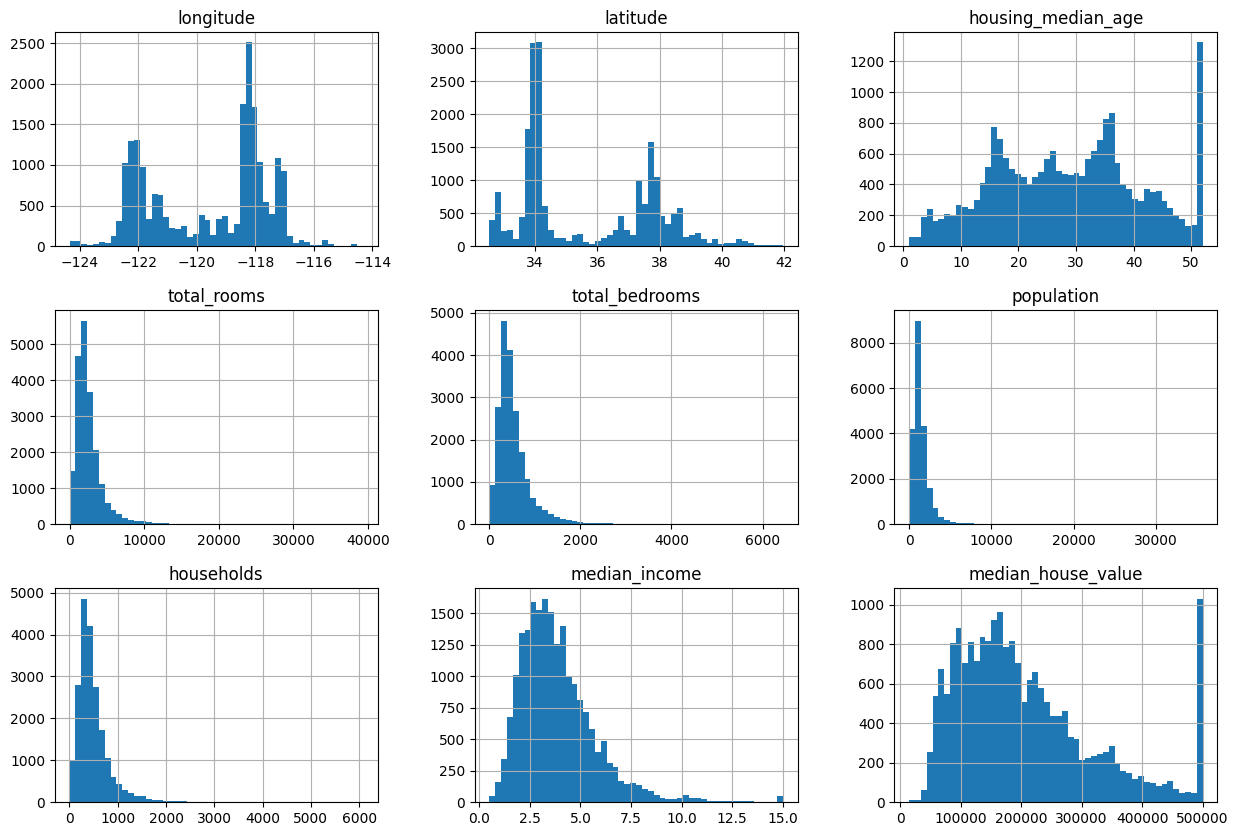

In [ ]:
#ver un historial de por ejemplo 50 para interpretar mas o menos como usar la informacion
housing_data.hist(bins=50, figsize= (15, 10))

<Axes: xlabel='longitude', ylabel='latitude'>

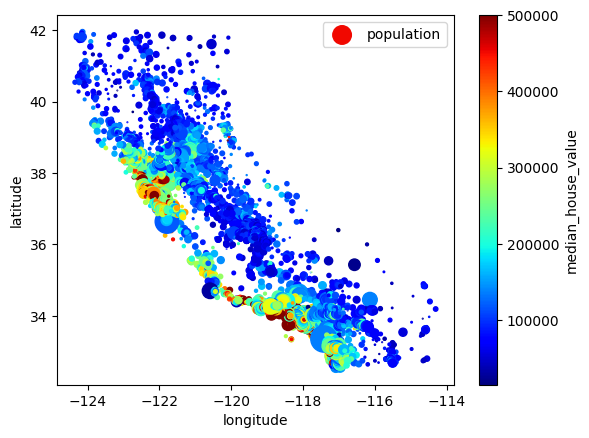

In [ ]:
#con esto podriamos interpretar distintas convinaciones de caracteristicas para ver que tipo de datos son mas importantes, o mas comunes
housing_data.plot(kind="scatter", x= 'longitude', y= 'latitude',
                  #tambien podemos por ejemplo ver la densidad poblacional, aqui solo lo dividimos entre 100 para leerlo mejor 'S' es size
                  s= housing_data['population'] /100, label= 'population',
                  #otra utilidad seria por ejemplo ver la densidad de precios en el dataset 'C' es color
                  #aquí lo que hacemos es pasar el precio medio de cada zona y con la funcion cmap para visualizar los datos con el color "jet"
                  c= 'median_house_value', cmap= plt.get_cmap("jet"))

In [8]:
#matriz que nos dice que tan correlacionada es un dato comparado a los demas, este nos da una matriz de atencion
housing_data.corr()

#o podemos hacerlo directamente para con una variable en especifico
hous_corr= housing_data.corr()
hous_corr['population'].sort_values(ascending= False)

<ipython-input-8-3dd39316318b>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  housing_data.corr()
<ipython-input-8-3dd39316318b>:5: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  hous_corr= housing_data.corr()


population            1.000000
households            0.907222
total_bedrooms        0.877747
total_rooms           0.857126
longitude             0.099773
median_income         0.004834
median_house_value   -0.024650
latitude             -0.108785
housing_median_age   -0.296244
Name: population, dtype: float64

Arreglar valores faltantes

In [ ]:
#luego tenemos varias opciones para el otro problema que teniamos que es el problema de que bedrooms tiene un dataset faltante,
# entre las opciones esta: borrar todo el dataset de bedrooms que quiza seria bueno si no fuera relevante pero en este caso si lo es
# el segundo seria intentar hacer una aproximacion con los datasets y meter la media para que crezca pero serian datos no reales
# el tercero y el que se usara sera nivelar todo, borrar de todos los datasets hasta que todo tenga el mismo nivel que total bedrooms

In [9]:
housing_na = housing_data.dropna(subset= ['total_bedrooms'])
housing_na.shape

(20433, 10)

In [10]:
#dummies es una funcion de pandas que es basicamente el one hot, con este podemos crear un patron binario para el dataset
dummies= pd.get_dummies(housing_na.ocean_proximity)
dummies

,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
0,0,0,0,1,0
1,0,0,0,1,0
2,0,0,0,1,0
3,0,0,0,1,0
4,0,0,0,1,0
...,...,...,...,...,...
20635,0,1,0,0,0
20636,0,1,0,0,0
20637,0,1,0,0,0
20638,0,1,0,0,0


In [ ]:
#ahora concatenamos los dummies con el dataset
housing_na_dummies= pd.concat([housing_na, dummies], axis= 'columns')
housing_na_dummies

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY,0,0,0,1,0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY,0,0,0,1,0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY,0,0,0,1,0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY,0,0,0,1,0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND,0,1,0,0,0
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND,0,1,0,0,0
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND,0,1,0,0,0
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND,0,1,0,0,0


In [ ]:
# es importante borrar aunque sea una de estas columnas dummies por la multicolinealidad, en este caso iland solo tiene 5 valores por lo tanto es el
#menos costoso en cuanto a datosy el mas irrelevante, a su vez ya que tenemos el one hot podemos borrar la columna de coean proximity

In [ ]:
housing_clean= housing_na_dummies.drop(['ocean_proximity', 'ISLAND'], axis= 'columns' )
housing_clean.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,<1H OCEAN,INLAND,NEAR BAY,NEAR OCEAN
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,0,0,1,0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,0,0,1,0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,0,0,1,0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,0,0,1,0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,0,0,1,0


Crear el modelo y entrenarlo


In [ ]:
X= housing_clean.drop(['median_house_value'], axis= 'columns')
Y= housing_clean['median_house_value']


X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

model = LinearRegression()

model.fit(X_train, Y_train)

prediccion= model.predict(X_test)

mse= mean_squared_error(prediccion, Y_test)

print(f"este es el mse: {mse}")

este es el mse: 4802173538.604135


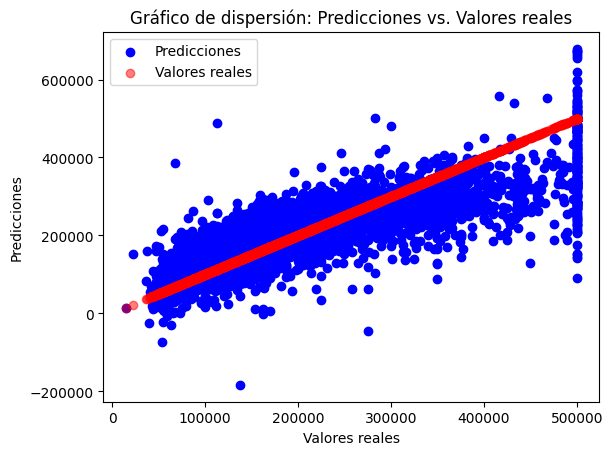

In [ ]:

plt.scatter(Y_test, prediccion, color='blue', label='Predicciones')
plt.scatter(Y_test, Y_test, color='red', label='Valores reales', alpha=0.5)
plt.xlabel('Valores reales')
plt.ylabel('Predicciones')
plt.title('Gráfico de dispersión: Predicciones vs. Valores reales')
plt.legend()
plt.show()